<center><h1> Exploratory Data Analysis of cars dataset (Part 2)</h1></center>

***

<center><h2> Univariate descriptive statistics </h2></center>

In [17]:
import set_jupyter_path
import pandas as pd 
import seaborn as sns
import numpy as np
pd.set_option('float_format', '{:.3f}'.format)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from src.car_price_prediction.utils import dataset_manager


In [18]:
car_data = dataset_manager.get_cleaned_outliers_dataset()

Let's again look at the statistics of cleaned, here everythin looks fine, next I will make some plots, on different columns on dataset. There is not a lot of columns, so I will check each one of them.

In [19]:
car_data.describe()

,Year,Power,Capacity,Mileage,Price
count,84488.000,66633.000,80541.000,53369.000,85910.000
mean,2006.380,203.504,2.728,126325.933,15925.503
std,6.857,86.769,1.110,80156.397,18654.624
min,1961.000,50.000,0.700,1.000,505.000
25%,2002.000,146.000,2.000,69700.000,4300.000
50%,2006.000,181.000,2.400,120361.000,9376.500
75%,2012.000,249.000,3.200,174000.000,20506.750
max,2018.000,600.000,6.400,800000.000,249000.000


Below we can see distribution plot of years of the car, we can see that there are some outliers, more precisely, some very old cars in the dataset, which is why the distribution is skewed to the left

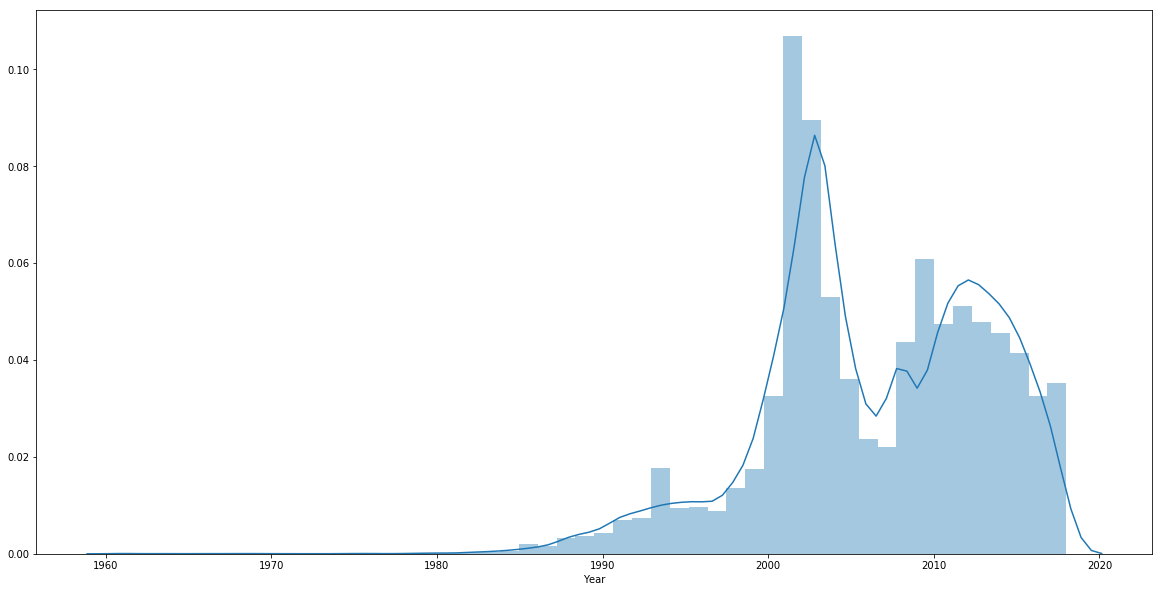

In [33]:
sns.distplot(car_data.Year.dropna())

Here we can see that the power of the cars a little bit skewed to the right, but more or less looks normal

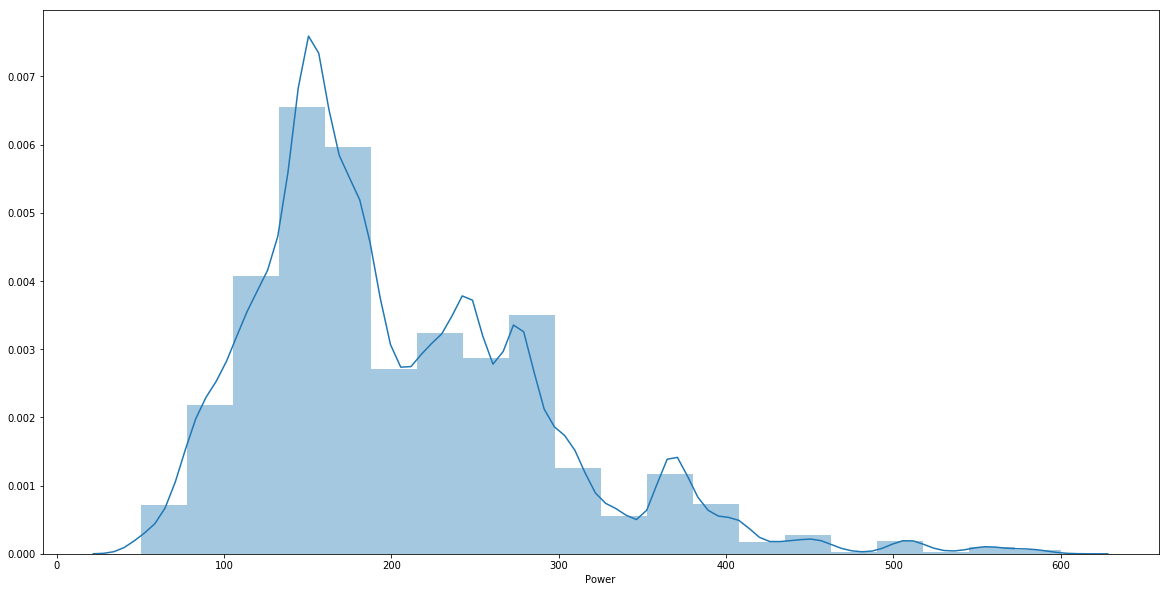

In [34]:
sns.distplot(car_data.Power.dropna(), bins=20)

In the plot below, we can see that the capacity column is more of a discrete variable, not a continous one. And the distribution looks fairly like the distribution of power of the cars, which is logically justified, because there are highly correlated.

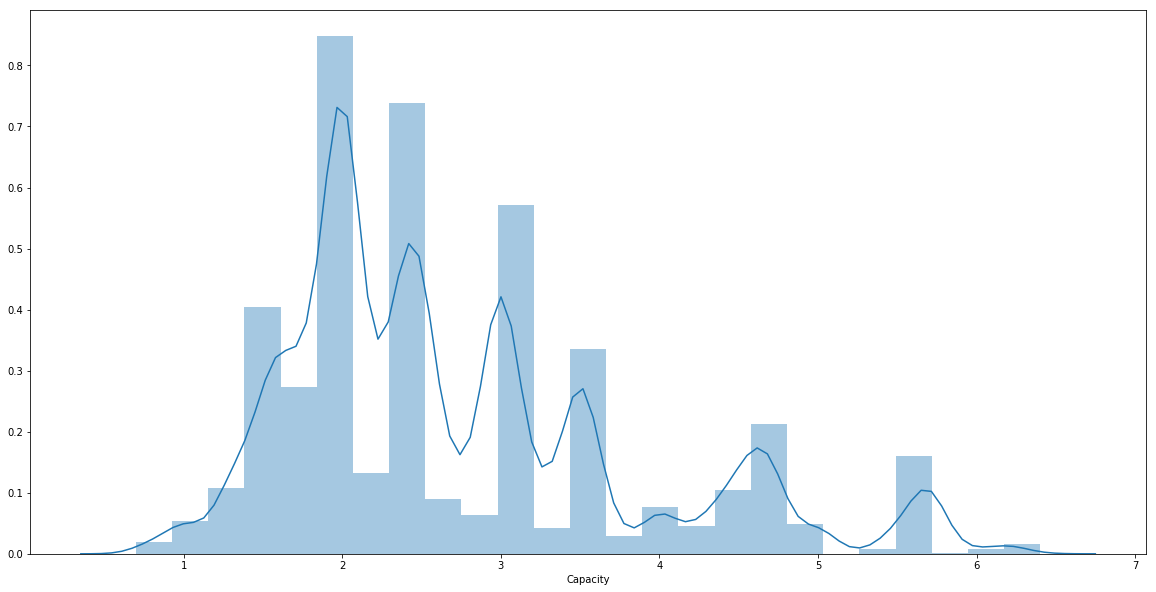

In [37]:
sns.distplot(car_data.Capacity.dropna(), bins=25)

This distribution of mileage below, shows skewed to the right distribution. It may mean that some of the cars with this large mileage are usually trucks or cars used for transits of goods or people.

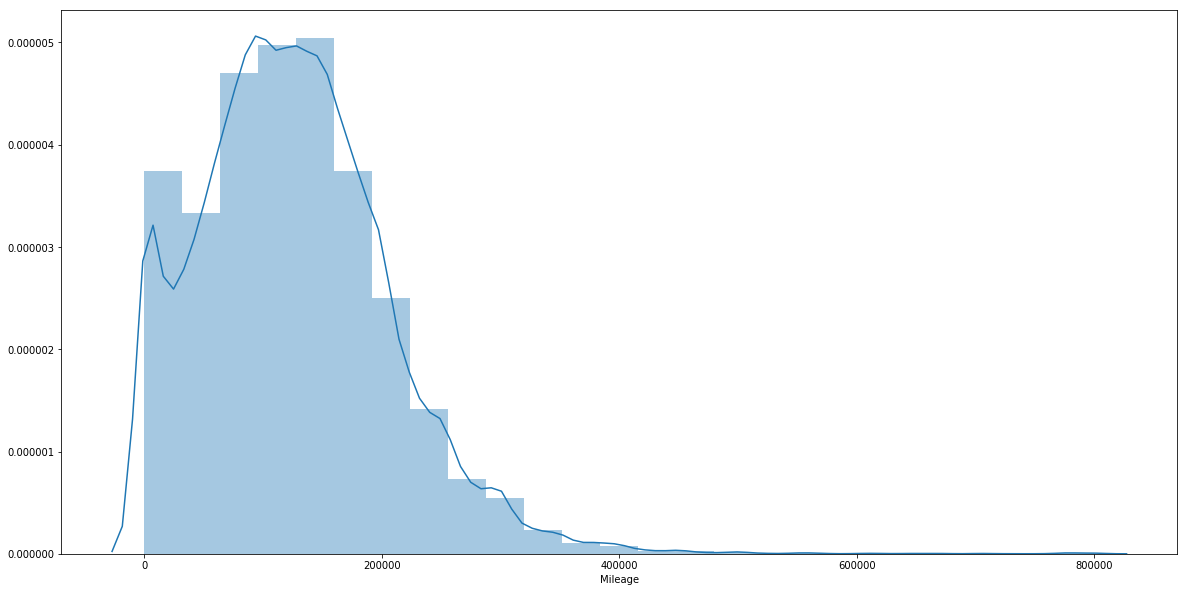

In [38]:
sns.distplot(car_data.Mileage.dropna(), bins=25)

Now let's look at the distribution of the target variable - prices of the cars. It's highly skewed to the right, which makes sense, most of the people use cars as a method of transportation, not as a method of showing their wealthines with highly overpriced cars.

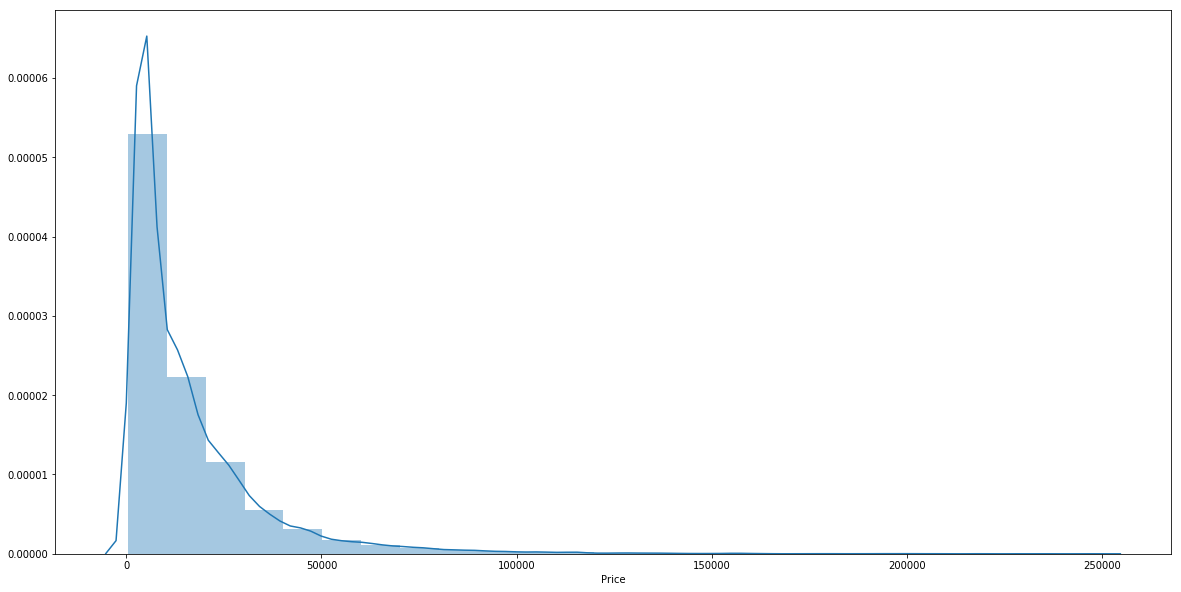

In [39]:
sns.distplot(car_data.Price.dropna(), bins=25)

Now it is a time to look at categorical features.